## Brief Introduction
In this notebook, I experimennt the visualization of Ranking Metrics for the Anomaly Detection Model after PCA. The problem is set up as "Unsupervised Anomaly Detection". I split the dataset into the Validation and Testing Dataset. 

The anomaly in the datast is a figure with mustache.

Data Source: http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from PIL import Image
from scipy.io import loadmat  
from scipy import stats  
from scipy.stats import multivariate_normal
import re
import glob
from operator import itemgetter 
import random
from random import shuffle
from processing_functions import * # local to this notebook

import os
os.chdir('../')

from support_functions import *
from PCA_Functions import *

Using TensorFlow backend.


## Parameters

In [2]:
n_components  = 50 # Define the number of Principal Components to keep from the image
k = 20 # to be used in the precision-k metric

## Import Dataset

In [3]:
# Define the images to be read and the corresponding labels
label_1_folder = [9,21]
target_folders = range(1,22)
data_path = "Yale_Faces_Data/CroppedYale/"

# Read image matrix (n*m), labels (vector of m), and image size
imgs, labels, height, width = get_data(label_1_folder,target_folders,data_path)

574  images are above our threshold and thus removed from the list


## Apply PCA for Dimension Reduction

### Define the number of components to be remained in the PCA Matrix

In [4]:
n_components = 20

### Encode with PCA

Below is the eigenfaces from the PCA Matrix


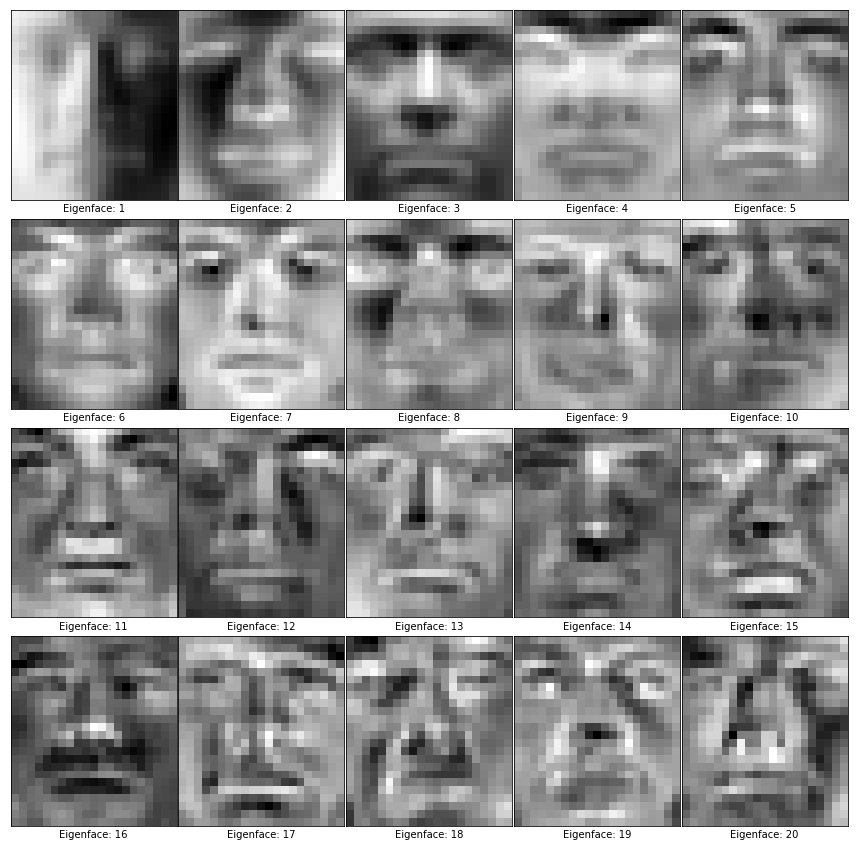

In [5]:
imgs_encoded,pca_matrix, component_mean = pca_all_processes(imgs,labels,n_components, plot_eigenfaces_bool = True,decode = False,height=height,width=width)

## Anomaly Detection with Multivariate Gaussian Method

### Split the Data into the Validation and Test Set
With the function, we get the indice of images to be assigned to the Validation and Testing set

In [6]:
# Split the images and labels
ratio_train = 0.8 # No training set
train_ind, test_ind = split_training(labels,ratio_train)

imgs_train = imgs_encoded[train_ind]
imgs_test = imgs_encoded[test_ind]

labels_train = labels[train_ind]
labels_test = labels[test_ind]

### Apply Multivariate Gaussian Distribution-based Anomaly Detector

Description of the data: 
# Data Points: 534
# Dimensions: 20


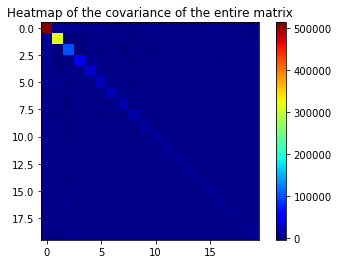

In [7]:
plot_heatmap_of_cov(imgs_train)

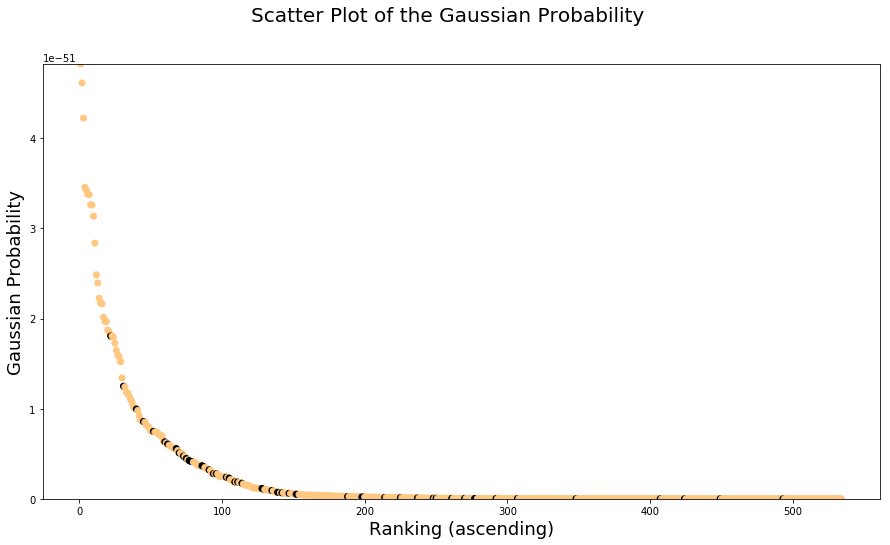

Training Results:
Precision: 10.1%
Recall: 100.0%
F-score: 18.4%
R-Precision (# R = 52): 1.9%
Precision@20: 0.0%

Precision: 9.3%
Recall: 100.0%
F-score: 17.0%
R-Precision (# R = 12): 0.0%
Precision@20: 0.0%


In [8]:
train_test_with_gaussian(imgs_train, imgs_test, labels_train, labels_test,k,plot_comparison = True)